In [1]:
import numpy as np
import pandas as pd
import time

import requests
import bs4
import json
import re

import tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yok018\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\yok018\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yok018\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yok018\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
def stock_prices(ticker):
    """
    ticker is the abbreviated symbol for a stock e.g.AAPL
    this function returns the daily price history of the requested stock as a dataframe
    """
    ticker = ticker.lower()
    filepath = 'quotes/' + ticker + '_quotes.csv'
    return pd.read_csv(filepath)

def ny_times_articles(keyword):
    url_dict = {}
    index = 0
    for i in range(40):
        response = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?q="+ keyword +"&fq=news_desk:Business&page="+str(i)+"&api-key=fO0tDSRQQdU68GkuXbMjt1uA2FYImzVp").json()
        try:
            docs = response['response']['docs']
            for item in docs:
                if (item['web_url'][8] == 'w') and ('video' not in item['web_url']): # To remove 'https://bits.blogs.nytimes...' or ''https://dealbook.nytimes...'
                    link = item['web_url']
                    date = link[24:28] + '-' + link[29:31] + '-' + link[32:34]
                    url_dict[index] = tuple((link, date))
                    index += 1
        except KeyError:
            continue
    return url_dict

In [3]:
stocks = stock_prices('AAPL')
url_dict = ny_times_articles('apple')

In [4]:
url_dict

{0: ('https://www.nytimes.com/2020/12/16/technology/facebook-takes-the-gloves-off-in-feud-with-apple.html',
  '2020-12-16'),
 1: ('https://www.nytimes.com/2020/12/13/business/media/apple-gawker-tim-cook.html',
  '2020-12-13'),
 2: ('https://www.nytimes.com/2020/12/23/business/dealbook/trump-stimulus-veto.html',
  '2020-12-23'),
 3: ('https://www.nytimes.com/2020/12/17/technology/google-antitrust-monopoly.html',
  '2020-12-17'),
 4: ('https://www.nytimes.com/2020/12/17/business/dealbook/tech-apple-facebook-fight.html',
  '2020-12-17'),
 5: ('https://www.nytimes.com/2020/12/01/technology/amazon-apple-chips-intel-arm.html',
  '2020-12-01'),
 6: ('https://www.nytimes.com/2020/12/15/technology/big-tech-regulation-europe.html',
  '2020-12-15'),
 7: ('https://www.nytimes.com/2020/12/14/technology/big-tech-lobbying-europe.html',
  '2020-12-14'),
 8: ('https://www.nytimes.com/2020/12/09/technology/personaltech/amazon-halo-review.html',
  '2020-12-09'),
 9: ('https://www.nytimes.com/2020/11/18/t

In [5]:
# use the closing prices of the stock as the daily prices and the differences in each day as the percentage rise or fall
# the difference of stock prices between date1 and date2 will be stored in the row of date1 for ease of comparison

def rem_dol(price):
    price = str(price)[2:]
    return float(price)

def chng_date(date):
    date = date.split('/')

    return date[2] + '-' + date[0] + '-' + date[1]

prices = stocks[' Close/Last'].apply(rem_dol)
dates = stocks['Date'].apply(chng_date)
stocks = stocks.assign(**{'price':prices})
difference = stocks.price.astype('float64').diff() * -1.0
pct_change = difference / prices

stock = pd.DataFrame({'date': dates, 'price':prices, 'change': difference, 'pct_change': pct_change})
stock

,date,price,change,pct_change
0,2020-12-31,132.6900,NaN,NaN
1,2020-12-30,133.7200,-1.0300,-0.007703
2,2020-12-29,134.8700,-1.1500,-0.008527
3,2020-12-28,136.6900,-1.8200,-0.013315
4,2020-12-24,131.9700,4.7200,0.035766
...,...,...,...,...
2512,2011-01-07,12.0043,0.2262,0.018843
2513,2011-01-06,11.9189,0.0854,0.007165
2514,2011-01-05,11.9286,-0.0097,-0.000813
2515,2011-01-04,11.8318,0.0968,0.008181


In [6]:
tokenized = tokenizer.tokenize_sentence(url_dict)

In [7]:
merged = tokenizer.merged

In [8]:
tokenized_word = tokenizer.tokenizer_myself(tokenized)

In [9]:
sentence_vals = tokenizer.sentence_calculator(tokenized_word)

In [10]:
article_vals = tokenizer.calculate_vals(sentence_vals)

In [11]:
# Delete articles (given index from tokenize_sentence function)
deletable_index = tokenizer.get_deletable_index()
for index in deletable_index:
    del url_dict[index]

In [12]:
# Add article scores to dataframe

In [13]:
stock['score'] = np.nan
stock

,date,price,change,pct_change,score
0,2020-12-31,132.6900,NaN,NaN,NaN
1,2020-12-30,133.7200,-1.0300,-0.007703,NaN
2,2020-12-29,134.8700,-1.1500,-0.008527,NaN
3,2020-12-28,136.6900,-1.8200,-0.013315,NaN
4,2020-12-24,131.9700,4.7200,0.035766,NaN
...,...,...,...,...,...
2512,2011-01-07,12.0043,0.2262,0.018843,NaN
2513,2011-01-06,11.9189,0.0854,0.007165,NaN
2514,2011-01-05,11.9286,-0.0097,-0.000813,NaN
2515,2011-01-04,11.8318,0.0968,0.008181,NaN


In [14]:
for element in url_dict:
    print(url_dict[element][1])

2020-12-16
2020-12-13
2020-12-23
2020-12-17
2020-12-17
2020-12-01
2020-12-15
2020-12-14
2020-12-09
2020-11-18
2020-11-10
2020-11-09
2020-11-10
2020-10-27
2020-10-25
2020-10-29
2020-10-20
2020-10-22
2020-10-21
2020-10-09
2020-10-06
2020-10-13
2020-10-12
2020-10-08
2020-09-28
2020-10-06
2020-10-06
2020-09-24
2020-09-28
2020-09-17
2020-09-16
2020-09-01
2020-09-04
2020-08-20
2020-09-03
2020-08-25
2020-08-19
2020-08-14
2020-08-26
2020-08-13
2020-08-04
2020-08-19
2020-08-19
2020-08-18
2020-08-18
2020-08-07
2020-07-28
2020-08-14
2020-08-10
2020-07-28
2020-08-08
2020-07-15
2020-07-31
2020-07-31
2020-07-30
2020-07-30
2020-07-30
2020-07-30
2020-07-29
2020-06-29
2020-07-29
2020-07-29
2020-07-29
2020-07-28
2020-06-19
2020-06-18
2020-06-22
2020-07-22
2020-07-21
2020-07-20
2020-06-16
2012-07-26
2008-07-26
2008-07-24
2015-02-20
2013-05-06
2020-07-15
2012-02-27
2011-08-10
2010-10-18
2016-04-06
2013-02-09
2011-02-18
2014-08-09
2010-09-06
2010-06-24
2006-08-25
2019-06-27
2006-06-30


In [15]:
# Using article_val's elements (ordered by date given in url_dict, since tokenizer uses for loop with iteration)
remove_index = []
for index in url_dict:
    try:
        stock_index = stock[stock['date'] == url_dict[index][1]].index[0]
        stock.loc[stock_index, 'score'] = article_vals[index]
    except IndexError:
        remove_index.append(index)

stock[0:30]

,date,price,change,pct_change,score
0,2020-12-31,132.690,NaN,NaN,NaN
1,2020-12-30,133.720,-1.030,-0.007703,NaN
2,2020-12-29,134.870,-1.150,-0.008527,NaN
3,2020-12-28,136.690,-1.820,-0.013315,NaN
4,2020-12-24,131.970,4.720,0.035766,NaN
5,2020-12-23,130.960,1.010,0.007712,0.241962
6,2020-12-22,131.880,-0.920,-0.006976,NaN
7,2020-12-21,128.230,3.650,0.028464,NaN
8,2020-12-18,126.655,1.575,0.012435,NaN
9,2020-12-17,128.700,-2.045,-0.015890,-0.192564


In [20]:
# Create ML using Linear Regression
from sklearn.model_selection import train_test_split # Data Splitting
from sklearn.linear_model import LinearRegression # LinearRegression Model
from sklearn.model_selection import train_test_split # Data Splitting


In [17]:
# Clean data
stock = stock.dropna()

In [18]:
# Change data's type to date
import datetime

string_date = stock['date'].to_list()
datetime_lst = []

for date in string_date:
    date_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    date_int = (10000 * date_obj.year) + (100 * date_obj.month) + (date_obj.day)
    datetime_lst.append(date_int)

stock['date'] = datetime_lst

stock

,date,price,change,pct_change,score
5,20201223,130.9600,1.0100,0.007712,0.241962
9,20201217,128.7000,-2.0450,-0.015890,-0.192564
10,20201216,127.8100,0.8900,0.006963,2.393963
11,20201215,127.8800,-0.0700,-0.000547,-2.164879
12,20201214,121.7800,6.1000,0.050090,-1.306130
15,20201209,121.7800,1.4600,0.011989,-2.708086
21,20201201,122.7200,0.3600,0.002934,-0.985977
29,20201118,118.0300,0.6100,0.005168,-1.649502
35,20201110,115.9700,3.5200,0.030353,-0.511076
36,20201109,116.3200,-0.3500,-0.003009,-0.362694


<AxesSubplot:xlabel='score', ylabel='change'>

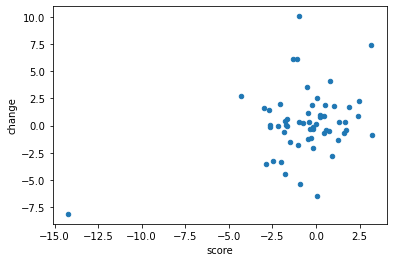

In [19]:
stock.plot(x='score', y='change', kind='scatter')

In [41]:
y = stock['change']
x = stock.drop(['change'], axis=1).drop(['date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)


In [42]:
X_train.head(5)

,price,pct_change,score
2364,12.9889,0.027524,1.312540
1477,32.3738,0.027065,0.442261
58,114.9700,0.017396,-2.064702
2122,20.5314,0.017885,1.633657
84,134.1800,-0.020718,0.942256


In [43]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)

LinearRegression()

In [44]:
prediction = linearRegressor.predict(X_test)

In [45]:
linearRegressor.score(X=X_test, y=y_test)

0.9595637425075202

In [46]:
rmse = np.sqrt(np.mean((prediction - y_test.values)**2))

In [47]:
rmse

0.6335825047362859